
The dataset we elected to use in our experiment is the Disease Symptom dataset found **here**:
https://www.kaggle.com/datasets/itachi9604/disease-symptom-description-dataset/data

It contains 41 diseases and 132 symptoms. Each disease can be represented by up to 17 symptoms. The dataset is intended for use in disease prediction problems.

The dataset consists of 4 .csv files:

1. ***symptom-severity.csv*** - this file contains a **list of symptoms along with their corresponding severities (weights)**. The weights provided in this file are crucial to allowing us to encode the symptoms in the disease dataset with their corresponding weights in the severity dataset

2. ***symptom-description.csv*** - this file contains pairs of symptoms and their detailed descriptions, this file was not as important for our purposes as it did not provide numerical data

3. ***symptom-precaution.csv*** - this file contains pairs of symptoms and the reccomended precautions one take when experiencing them. Like the symptom-description.csv file, symptom-precaution.csv was not essential to our work on this project

4. ***dataset.csv*** - this file serves as the **main dataset** that we employed in training and testing our machine learning models. It contains rows of diseases, each presenting with a set of symptoms. There are 4920 rows, all representing an individual "case" with its corresponding set of symptoms



## Data Preparation and Preprocessing

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

df = pd.read_csv('dataset.csv')
severity = pd.read_csv('Symptom-severity.csv')


In [2]:
df.head(5)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:

for col in df.columns: 
    df[col] = df[col].str.replace('_',' ')

object_columns = df.select_dtypes(include='object').columns
#strips away white and leading spaces in strings for disease data
for col in object_columns:
    if df[col].dtype == 'O':
        df[col] = df[col].str.strip()


severity['Symptom'] = severity['Symptom'].str.replace('_', ' ')
#replacing the NaN values with 0
df = df.fillna(0)

We first ran into the issue of having mismastched strings between the severity dataset and disease dataset.
We started off by replacing all the underscores used in the disease and symptom names with spaces in order to format the text data we fed the models. 

Additionally, we trimmed any trailing or leading whitespaces to provide consistency in our data.

In [4]:
severity.head(5)

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5


In [5]:
df.head(5)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin rash,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin rash,nodal skin eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:

for i in severity.index: 
    symptom_name = severity['Symptom'][i]
    
    severity_weight = severity['weight'][i]
    df = df.replace(symptom_name, severity_weight)
    
#these must be hard-coded due to odd spacing like '__' instead of just '_'
df = df.replace('dischromic  patches', 6)
df = df.replace('spotting  urination', 6)
df = df.replace('foul smell of urine', 5)
df.head(5)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We encoded the symptoms in the dataset with the corresponding severities found in the severity dataset. We did this so we could change the symptom variables in the 
dataset from categorical variables to numerical variables. This transformation from qualitative to quantitative information allows us to enhance the
models' ability to discern relationships and patterns in the data. 

**The models gain the ability to differentiate between symptoms based on the perceived severity.** The severity weights
allow the model to provide more priority to certain symptoms that may be more indicative of a particular disease.

In [7]:
disease_data = df.iloc[:, 1:]
disease_labels = df['Disease']


Here we are splitting up the disease data into a separate data and labels dataframe. The *disease_labels* represent the 4920 diseases found in the first column of the dataset that we use for testing. 
The disease_data contains all the symptoms we use to match up with the labels.

## SVM Classifier

In [8]:
#SVM
scaler = StandardScaler()
original = []
scaled = []

for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(disease_data, disease_labels, test_size=0.2, random_state=i)
    svm_classifier = SVC(kernel='linear')
    # Train the model using the training data
    svm_classifier.fit(X_train, y_train)
    # Predict disease labels on the testing data
    y_pred = svm_classifier.predict(X_test)
    # Calculate accuracy
    original.append(np.mean(y_pred == y_test))

scale_disease = disease_data
scaler.fit(scale_disease)
scale_disease = scaler.transform(scale_disease)

for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(scale_disease, disease_labels, test_size=0.2, random_state=i)
    svm_classifier = SVC(kernel='linear')
    # Train the model using the training data
    svm_classifier.fit(X_train, y_train)
    # Predict disease labels on the testing data
    y_pred = svm_classifier.predict(X_test)
    # Calculate accuracy
    scaled.append(np.mean(y_pred == y_test))

data = [
    ['SVM', np.mean(original), np.std(original)],
    ['SVM Standardized', np.mean(scaled), np.std(scaled)]
]
pd.DataFrame(data, columns = ['', 'Mean', 'StdDev'])

,,Mean,StdDev
0,SVM,0.979268,0.003613
1,SVM Standardized,0.975203,0.002987


Text(0, 0.5, 'SVM Accuracy')

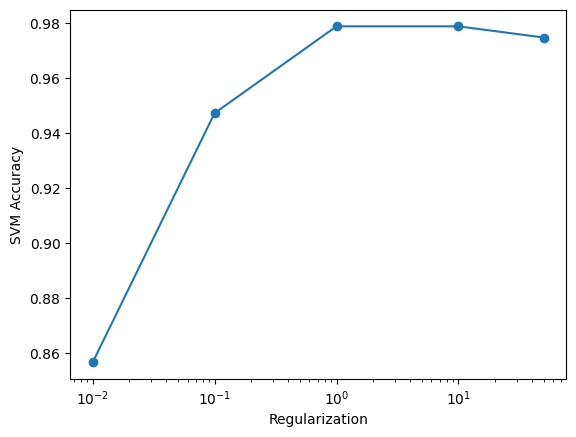

In [9]:
C_param = [.01, .1, 1, 10, 50]
accuracies = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(disease_data, disease_labels, test_size=0.2, random_state=i)
    svm_classifier = SVC(kernel='linear', C=C_param[i])
    # Train the model using the training data
    svm_classifier.fit(X_train, y_train)
    # Predict disease labels on the testing data
    y_pred = svm_classifier.predict(X_test)
    # Calculate accuracy
    accuracies.append(np.mean(y_pred == y_test))

plt.semilogx(C_param, accuracies, marker = 'o')
plt.xlabel('Regularization')
plt.ylabel('SVM Accuracy')

Using StandardScaler on disease_data to standardize the data, we compared the **SVM’s** performance on standardized data versus on the original data. 
The results displayed in the table below show that the SVM performed better when using the original dataset. This occurred because the severity (weights) of the symptoms
allow the models to understand which symptoms may be more indicative of a certain disease. When these are standardized the signifance of the weights is slighty reduced.
Even though the non-standardized data was more accurate, the difference is extremely small and both still accurately predict the disease.

**Our results were very positive due to SVM's ability to deal with high-dimensional data.** Through encoding the data, we better allowed the SVM to discern different patterns in such a high-dimensional space.
We adjusted the C regularization parameter from .01 - 50 and saw that the SVM model improves as we increase this number. This is because having a higher regularization parameter is much more 
effective for datasets with less outliers.

## Random Forest Classifier

[0.991869918699187, 0.991869918699187, 0.9898373983739838, 0.9908536585365854, 0.9949186991869918]


Text(0, 0.5, 'Random Forest Accuracy')

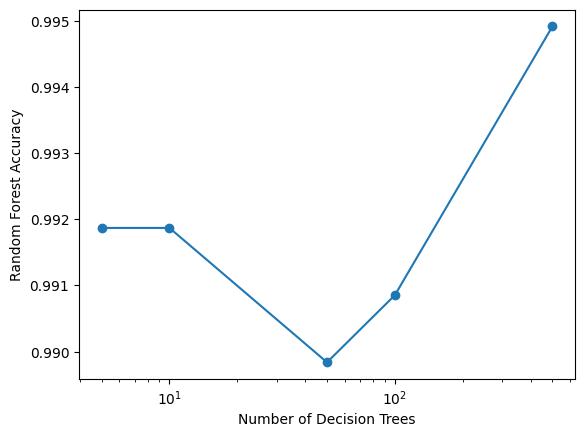

In [10]:
#Random Forest
accuracies = []
estimator = [5, 10, 50, 100, 500]
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(disease_data, disease_labels, test_size=0.2, random_state=i)
    random_forest = RandomForestClassifier(n_estimators=estimator[i], random_state=42)
    # Fit the model on the training data
    random_forest.fit(X_train, y_train)

    # Predict disease labels on the testing data
    y_pred = random_forest.predict(X_test)

    # Calculate accuracy
    accuracies.append(np.mean(y_pred == y_test))

print(accuracies)

plt.semilogx(estimator, accuracies, marker = 'o')
plt.xlabel('Number of Decision Trees')
plt.ylabel('Random Forest Accuracy')

In [11]:
accuracies = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(disease_data, disease_labels, test_size=0.2, random_state=i)
    random_forest = RandomForestClassifier(n_estimators=500, random_state=42)
    # Fit the model on the training data
    random_forest.fit(X_train, y_train)

    # Predict disease labels on the testing data
    y_pred = random_forest.predict(X_test)

    # Calculate accuracy
    accuracies.append(np.mean(y_pred == y_test))

data = [
    ['Random Forest', np.mean(accuracies), np.std(accuracies)],
]
pd.DataFrame(data, columns = ['', 'Mean', 'StdDev'])

,,Mean,StdDev
0,Random Forest,0.99187,0.001701


We found that the **Random Forest** model performed *very* well across all of the configurations. This makes sense as Random Forest models are well-known for their performance in high-dimensional spaces like the disease dataset.

Additionally, the structure of Random Forests, which involves creating multiple decision trees and aggregating their results, offers advantages in high dimensional spaces. By constructing multiple trees and using a majority voting system for the final prediction, Random Forests effectively balance bias and variance and can achieve very high accuracy as displayed by our model.

Another factor contributing to the success of the Random Forest in our dataset is its ability to handle complex, non-linear relationships between features. Diseases and symptoms often exhibit such relationships, and the Random Forest algorithm can capture these without the need for extensive feature engineering. Each tree in the forest considers different subsets and interactions of features, enabling the ensemble to capture a wide range of patterns and nuances in the data.

## K-Nearest Neighbors Classifier

[0.9898373983739838, 0.991869918699187, 0.9806910569105691, 0.9654471544715447, 0.8983739837398373]


Text(0, 0.5, 'K Nearest Neighbors Accuracy')

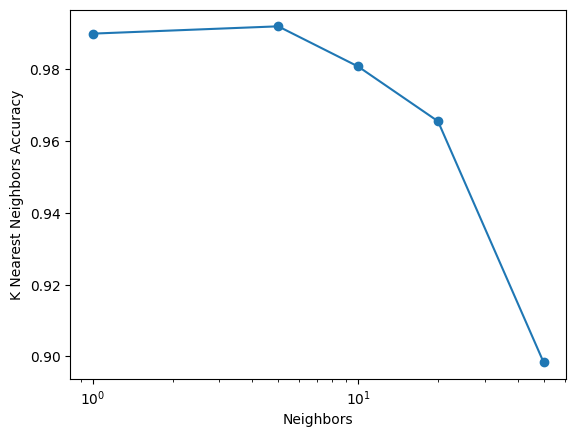

In [12]:
neighbors = [1, 5, 10, 20, 50]
accuracies = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(disease_data, disease_labels, test_size=0.2, random_state=i)

    X_train = np.ascontiguousarray(X_train)
    X_test = np.ascontiguousarray(X_test)
    y_train = np.ascontiguousarray(y_train)
    y_test = np.ascontiguousarray(y_test)

    knn = KNeighborsClassifier(n_neighbors=neighbors[i])
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(np.mean(y_pred == y_test))
    
print(accuracies)

plt.semilogx(neighbors, accuracies, marker = 'o')
plt.xlabel('Neighbors')
plt.ylabel('K Nearest Neighbors Accuracy')

In [13]:
accuracies = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(disease_data, disease_labels, test_size=0.2, random_state=i)

    X_train = np.ascontiguousarray(X_train)
    X_test = np.ascontiguousarray(X_test)
    y_train = np.ascontiguousarray(y_train)
    y_test = np.ascontiguousarray(y_test)
    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(np.mean(y_pred == y_test))

data = [
    ['K-Nearest Neighbors', np.mean(accuracies), np.std(accuracies)],
]
pd.DataFrame(data, columns = ['', 'Mean', 'StdDev'])

,,Mean,StdDev
0,K-Nearest Neighbors,0.991463,0.003056


This code cell is dedicated to evaluating the effectiveness of a K-Nearest Neighbors classifier.

We found that the **K-Nearest Neighbors Classifier** was initially quite effective when being run with between 1 and 5 neighbors, but its accuracy began to quickly diminish as we added more neighbors. This is because as we added more neighbors, we caused the model to over-generalize and it failed to recognize relevant patterns in the data.

## Conclusions:

**The Disease Prediction Dataset proved both interesting and complex to work with.** It's high dimensionality was initially a challenge for us to wrap our heads around and properly account for; but by the end of our work, we gained a lot of experience not only with high-dimensional data but also with problems akin to what we see in the real world (*for example: datasets with large numbers of missing values*)

As far as ourselves, a major area of growth for us was figuring out how to properly analyze large datasets using multiple classifiers and recognizing the *immense* importance of gaining a firm understanding of your data before applying it to models. 

Our experimentation showed that most of the models we implemented performed tolerably or even excelled as in the case of the **K-Nearest Neighbors** classifier, however, proper feature engineering and hyperparameter tuning was key to maintaining performance which was valuable hands-on experience for us. Though the other models we implemented scored well, the **Random Forest** model showed the most consistency across testing situations. Random Forest by far had the best accuracy across its testing sets, consistently scoring over 99% accuracy which shows the prowess of the technique in data such as ours.

Experimentation Performed and Interpretted by: *Alexander Miller* and *Peter Caprio*
